# As for the regression problem in TensorFlow, in this part I'm going to learn:
* architecture of a neural network regression model
* input shapes and output shapes of a regression model (features and labels)
* creating custom data to view and fit
* steps in modelling (creating, compiling, fitting, evaluating)
* different evaluation methods
* saving and loading models

### Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case we're going to simplify it: predicting a numerical value based on some other combination of variables. Even shorter: predicting a number.

In [ ]:
# Importing TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


### Creating data to view and fit


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

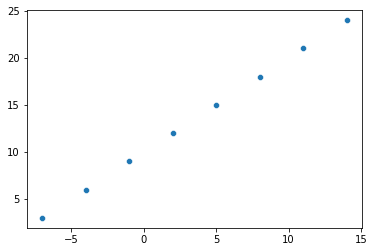

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
sns.scatterplot(x=X, y=y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our house price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim # scalar!

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

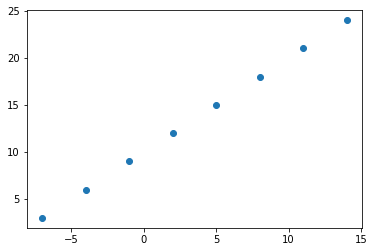

In [ ]:
plt.scatter(X ,y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers fo a deep learning model.
2. **Compiling the model** - define the loss funciton (the function that tells the model how wrong it is), the optimizer (how to improve the patterns) and evaluation metrics (what we can use to interpret the performance).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Create random seed
tf.random.set_seed(42)


# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE - mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD - stochastic gradient descend
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 253ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 50ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden neurons within each of hidden layers, change the activation functions of each layer

2. **Compiling a model** - here we can change the optimization function or perhaps the learning rate of said optimization function

3. **Fitting a model** - here we might fit a model for more epochs (train longer) or on more data (give more examples).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 239ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Another shot at improving with some small tweaks

# 1. Create the model (with an extra hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [ ]:
# Let's look at data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Another prediction
model.predict([17.0]) # model might be overfitted

1/1 [==============================] - 0s 62ms/step


array([[31.223133]], dtype=float32)

In [ ]:
# Another shot at improving with some small tweaks

# 1. Create the model (with an extra hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # learning rate is probably most important hyperparameter
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 323ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1377 - mae: 10.1377
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5933

In [ ]:
# Let's look at data
X, y

# Yet another prediciton
model.predict([17.0]) # model might be overfitted

1/1 [==============================] - 0s 106ms/step


array([[27.890333]], dtype=float32)

## Evaluating a model
In practice a typical workflow you go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

When it comes to evaluation, there are 3 words you should memorize:
>"Visualize, visualize, visualize"

It's a good idea to visualize:
* the data - what data are we working with, what does it look like
* the model itself - how does it look like
* training of a model - how does it perform while learning
* predictions of a model - how do predictions of a model line up against ground truth (original label)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

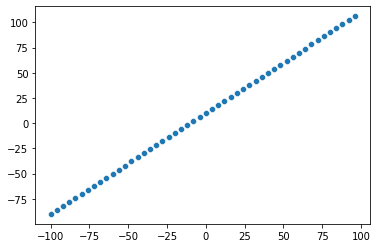

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=X, y=y)

### The 3 sets...
* **Training set** - the model learns from this data, typically 70-80% of total data available
* **Validation set** - model gets tuned on this data, which typically is 10-15% of the data available
* **Test set** - model gets evaluated on this data what is has learned, typically 10-15% of data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data
X_train = X[:40] # first 40 samples -> 80% of data
X_test = X[40:] # last 10 samples -> 20% of data

y_train = y[:40] # first 40 samples -> 80% of data
y_test = y[40:] # last 10 samples -> 20% of data

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Splitting the data into training set and testing set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualizing the data
As we have the data split between train and test set, we can visualize it!

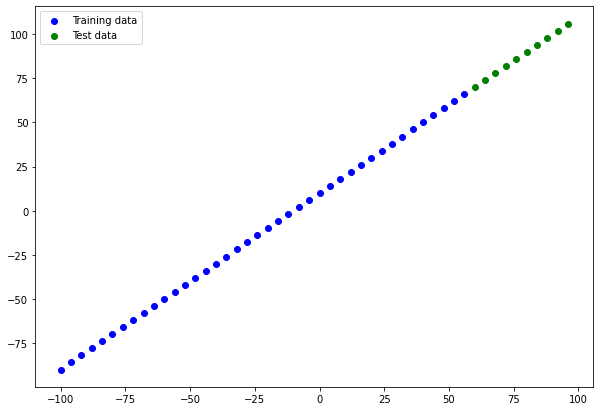

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Test data')

plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualizing the model

In [ ]:
#model.summary()

In [ ]:
#model.build()

In [ ]:
# Let's create a model that build automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'), # number of variables
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the patters model can update while it trains
* Non-trainable params - these parameters aren't updated duting training (this is typical when you bring already learned patterns during **transfer learning**)

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 [==============================] - 0s 7ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/150
2/2 [==============================] - 0s 6ms/step - loss: 19.0261 - mae: 19.0261
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 13.5868 - mae: 13.5868
Epoch 4/150
2/2 [==============================] - 0s 6ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 8.6328 - mae: 8.6328
Epoch 6/150
2/2 [==============================] - 0s 5ms/step - loss: 10.8267 - mae: 10.8267
Epoch 7/150
2/2 [==============================] - 0s 5ms/step - loss: 11.7707 - mae: 11.7707
Epoch 8/150
2/2 [==============================] - 0s 6ms/step - loss: 11.8002 - mae: 11.8002
Epoch 9/150
2/2 [==============================] - 0s 7ms/step - loss: 11.1963 - mae: 11.1963
Epoch 10/150
2/2 [==============================] - 0s 5ms/step - loss: 10.0508 - mae: 10.0508
Epoch 11/150
2/2 [==============================] - 0s 5ms/step

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


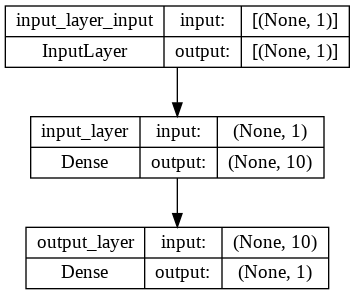

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualing our model's predictions
To visualize prediction it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[ 69.88523 ],
       [ 73.88121 ],
       [ 77.877174],
       [ 81.87314 ],
       [ 85.86911 ],
       [ 89.865074],
       [ 93.86105 ],
       [ 97.85702 ],
       [101.85298 ],
       [105.848946]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predcitions to ground truth labels.
    """

    plt.figure(figsize=(10,7))

    # Training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Test data in green
    plt.scatter(test_data, test_labels, c='g', label='Test data')

    # Model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend()

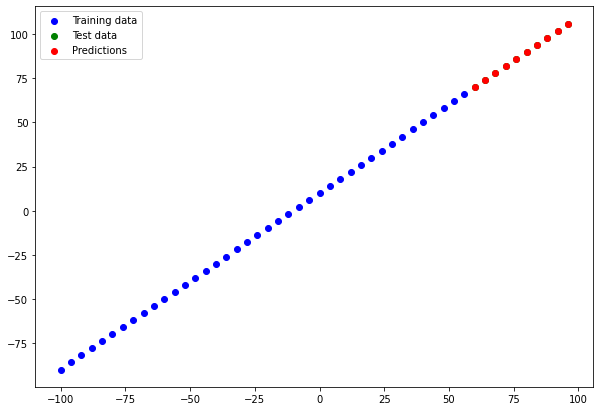

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there are different evaluation metrics to evaluate model's performance.

Since we're working on a regression, two of the main metrics are:
* MAE - mean absolute error, 'on average, how wrong is each of model's predictions'
* MSE - mean squared error, 'square the average errors'

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 0.1329 - mae: 0.1329


[0.13290634751319885, 0.13290634751319885]

In [ ]:
y_pred

array([[ 69.88523 ],
       [ 73.88121 ],
       [ 77.877174],
       [ 81.87314 ],
       [ 85.86911 ],
       [ 89.865074],
       [ 93.86105 ],
       [ 97.85702 ],
       [101.85298 ],
       [105.848946]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.114769, 14.895032, 12.473696, 10.850744, 10.026178, 10.      ,
       10.772211, 12.342807, 14.711789, 17.879156], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.88523 ],
       [ 73.88121 ],
       [ 77.877174],
       [ 81.87314 ],
       [ 85.86911 ],
       [ 89.865074],
       [ 93.86105 ],
       [ 97.85702 ],
       [101.85298 ],
       [105.848946]], dtype=float32)>

In [ ]:
# Getting rid of one dimension
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.88523 ,  73.88121 ,  77.877174,  81.87314 ,  85.86911 ,
        89.865074,  93.86105 ,  97.85702 , 101.85298 , 105.848946],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test, 
                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.13290635>

In [ ]:
# Calculate the mean squared error
mse = tf.keras.metrics.mse(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.017798202>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true, 
                              y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_true, 
                              y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak ...
```

1. Get more data - get more examples for model to train on (more opportunities to learn patters or relationships between features and labels).
2. Make your model larger (more complex) - more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to fit patterns in data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, 100 epochs
2. `model_2` - 2 layers, 100 epochs
3. `model_3` - 2 layers, 500 epochs
4. `model_4` - ???

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 32ms/step


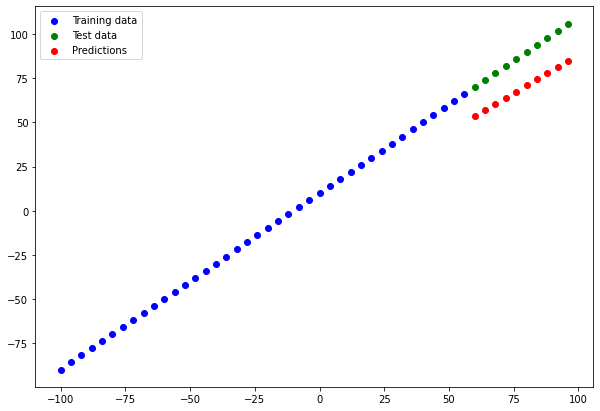

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**
* 2 Dense layers trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fitting the model
model_2.fit(tf.expand_dims(X_train, axis=-1), 
            y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 44ms/step


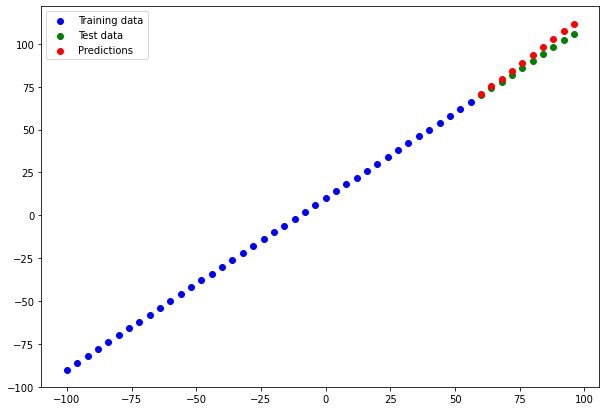

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Evaluate model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fitting the model
model_3.fit(tf.expand_dims(X_train, axis=-1), 
            y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/500
2/2 [=========================

1/1 [==============================] - 0s 70ms/step


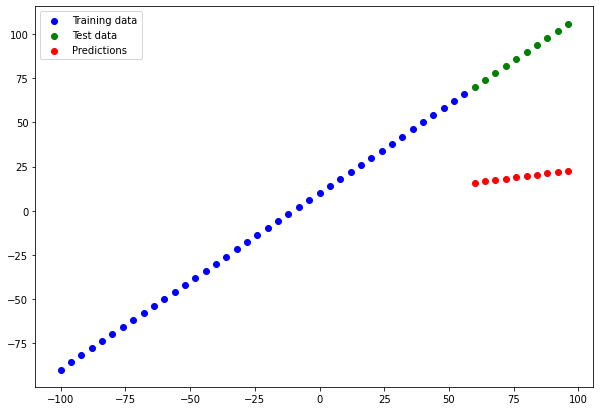

In [ ]:
# Make predictions on model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

1/1 [==============================] - 0s 40ms/step


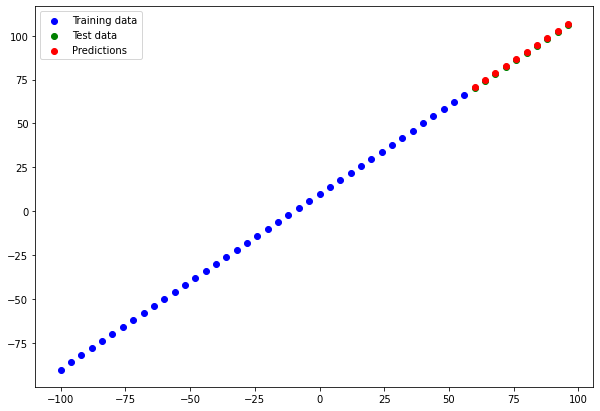

In [ ]:
# Model_4, all by myself

# Build a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mse'])

# Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300, verbose=0)

# Predict values
y_preds_4 = model_4.predict(X_test)

# Plot the results
plot_predictions(predictions=y_preds_4)

# Get the evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)

## Comparing the results of our experiments
We've run few experiments, let's compare them now

In [ ]:
# Let's compare our model's results using Pandas dataframe
import pandas as pd

model_results=[['model_1', mae_1.numpy(), mse_1.numpy()],
               ['model_2', mae_2.numpy(), mse_2.numpy()],
               ['model_3', mae_3.numpy(), mse_3.numpy()],
               ['model_4', mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mse', 'mae'])
all_results

,model,mse,mae
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320
3,model_4,0.697124,0.496647


In [ ]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Looks like `model_4` performed the best.

> **NOTE**<br>
One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which do not work and in turn, you'll get close to figure out what does work.
Remember the motto: `experiment, experiment, experiment`

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us.


📖**Resource:** As you build more models, you may want to look into using:
* TensorBoard - a component of TensorFlow library to help track modelling experiments (covered later)
* Weight & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) for website or mobile app.

There are two main formats we can save our model to:
* SavedModel format
* HDF5 format


In [ ]:
# Saving model using SavedModel format
model_4.save('best_model_SavedModel_format')

In [ ]:
# Save the model using HDF5 format
model_4.save('best_model_HDF5_format.h5')

## Loading in a saved model

In [ ]:
# Load in SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_4 with SavedModel format model predictions
model_4_preds = model_4.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_4_preds, loaded_SavedModel_format_preds

1/1 [==============================] - 0s 34ms/step


(array([[ 70.53534 ],
        [ 74.57129 ],
        [ 78.60724 ],
        [ 82.643196],
        [ 86.679146],
        [ 90.7151  ],
        [ 94.75105 ],
        [ 98.787   ],
        [102.82296 ],
        [106.85892 ]], dtype=float32), array([[ 70.53534 ],
        [ 74.57129 ],
        [ 78.60724 ],
        [ 82.643196],
        [ 86.679146],
        [ 90.7151  ],
        [ 94.75105 ],
        [ 98.787   ],
        [102.82296 ],
        [106.85892 ]], dtype=float32))

In [ ]:
# Compare the MAE of model_4 and loaded SavedModel model
mae(y_true=y_test, y_pred=model_4_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_4_preds.squeeze()

array([ 70.53534 ,  74.57129 ,  78.60724 ,  82.643196,  86.679146,
        90.7151  ,  94.75105 ,  98.787   , 102.82296 , 106.85892 ],
      dtype=float32)

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.53534 ,  74.57129 ,  78.60724 ,  82.643196,  86.679146,
        90.7151  ,  94.75105 ,  98.787   , 102.82296 , 106.85892 ],
      dtype=float32)

In [ ]:
model_4_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
model_4_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading a model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

In [ ]:
loaded_h5_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_4

model_4_preds = model_4.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)


model_4_preds == loaded_h5_model_preds        

1/1 [==============================] - 0s 39ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try to one hot encode our insurance dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
# Create X and y values (feature and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 3s 4ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 7493.1738 - mae: 7493.1738

In [ ]:
# Check the results of the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4540.6548 - mae: 4540.6548


[4540.65478515625, 4540.65478515625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## The model does not perform that well, let's try to improve it!

To (try) improve our model, two experiments shall be conducted:
1. Add extra layer with more hidden units and used the Adam optimizer
2. As above, but train for longer
3. (insert idea here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit a model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

# 3. Fit a model
history = insurance_model_3.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 10889.2500 - mae: 10889.2500
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 7577.3237 - mae: 7577.3237
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 7287.9546 - mae: 7287.9546
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7005.7925 - mae: 7005.7925
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 6719.1860 - mae: 6719.1860
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 6413.3740 - mae: 6413.3740
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6265.1211 - mae: 6265.1211
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 6108.3818 - mae: 6108.3818
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 5860.1870 - mae: 5860.1870
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 5580.8613 - mae: 5580.86

In [ ]:
# Evaluate the model_3
insurance_model_3.evaluate(X_test, y_test), insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


([3168.51171875, 3168.51171875], [4924.5107421875, 4924.5107421875])

Text(0.5, 0, 'epochs')

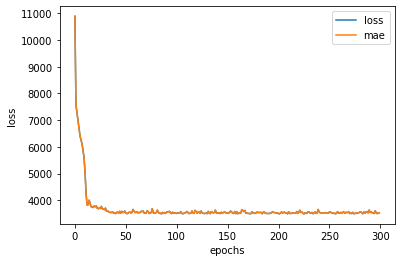

In [ ]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## **Question**: How long should you train for?

It depends, really. It depends on the problem you're working on. However, many people have asked this question before. Fortunately, TensorFlow has a solution and it's called Early Stopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standarization)

In terms of scaling values, neural networs tend to prefer normalization. 

If you're not sure which to use, you could try both and see which performs better.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


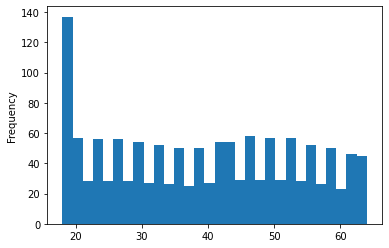

In [ ]:
X['age'].plot(kind='hist', bins=30)

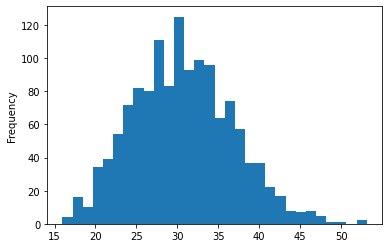

In [ ]:
X['bmi'].plot(kind='hist', bins=30)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepere our data, we can borrow few classes form Scikit-Learn.

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all the values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [66]:
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [67]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [68]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! 
Our data has been normalized and one-hot encoded. Now let's build a neural network model on top of it!

In [75]:
tf.random.set_seed(42)

# 1. Create a model
insurance_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_normal.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['mae'])

# 3. Fit the model
history = insurance_normal.fit(X_train_normal, y_train, epochs=150, verbose=1) 

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13344.5098 - mae: 13344.5098
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 13336.2988 - mae: 13336.2988
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 13305.7920 - mae: 13305.7920
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 13210.2090 - mae: 13210.2090
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 12967.7061 - mae: 12967.7061
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 12451.3555 - mae: 12451.3555
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 11519.2773 - mae: 11519.2773
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 10277.7314 - mae: 10277.7314
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 9061.4717 - mae: 9061.4717
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 8252.6846 

In [76]:
# Evaluate the model
insurance_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.4385 - mae: 3160.4385


[3160.4384765625, 3160.4384765625]

Text(0, 0.5, 'mae')

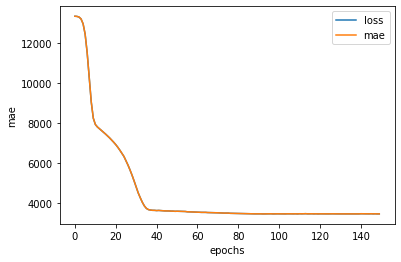

In [77]:
# Plot the learning curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('mae')